### **Unlocking Real Estate Insights: Predicting House Prices With Advanced Regression**

#### **BUSINESS PROBLEM**

Objective: Predict the sale price of houses based on various features and attributes.

The real estate market is highly dynamic and influenced by various factors like location, size, design, and age of a house, among others. Real estate agents, developers, and investors face challenges in accurately determining the market value of properties. This prediction is crucial for:

1. Real estate agents who need to set competitive prices for properties.
2. Home buyers and sellers who want to make informed decisions.
3. Investors and developers who require accurate valuations for future investments.

A business-driven problem could be how to improve the accuracy of property price predictions based on available property features. Incorrect price estimations can lead to significant financial losses, inefficient sales cycles, or missed investment opportunities.

#### **Business Understanding**

Goal: Build a machine learning model that can predict the final sale price of a house based on its attributes.

*Impact:*

1. The ability to predict house prices with high accuracy allows stakeholders to optimize their pricing strategies and make more informed decisions.
2. Homebuyers can avoid overpaying or underpricing their homes.
3. Investors can accurately gauge property values, making better investment choices.
4. Real estate companies can improve their marketing strategies by focusing on properties that align with the predicted prices.

*Constraints:*

1. Availability of relevant data might be limited or incomplete.
2. The diversity of features (e.g., location, amenities, house size) complicates the model’s ability to generalize.
3. Economic factors (e.g., market fluctuations, interest rates) not directly captured by the data may influence the final price.

#### **Data Understanding**

The dataset typically includes several features describing the properties of houses and their sale prices. These features can be divided into different categories, such as:

*Numerical Features:*

SalePrice (Target Variable): The actual sale price of the house (dependent variable).
OverallQual: Overall material and finish quality of the house.
GrLivArea: Above ground living area (square feet).
YearBuilt: The year the house was built.
GarageCars: Number of cars that fit in the garage.
TotRmsAbvGrd: Total number of rooms above ground.

*Categorical Features:*

Neighborhood: The neighborhood where the house is located.
ExterCond: Condition of the exterior material.
MasVnrType: Masonry veneer type.
BsmtQual: Basement quality.

Text Features: Descriptions or text fields for certain attributes (e.g., comments about property features).

Missing Values: Some columns have missing data, which need to be handled either by imputation or removal.

Outliers: Extreme values in some features, such as an unusually large house or a very low-quality house, could skew the model’s predictions. These outliers need to be addressed to avoid model bias.

Correlation: Some features are likely to be highly correlated, such as "GrLivArea" and "TotRmsAbvGrd," and understanding these correlations helps in feature selection and dimensionality reduction.

**Data Quality Considerations:**

Missing Data: Several features may have missing values (e.g., features related to basements or garages). A strategy to handle missing data (e.g., imputation or removal) should be defined.

Feature Engineering: New features might need to be created by transforming or combining existing features, such as creating a new feature from "YearBuilt" and "YearRemodeled."

Data Scaling: Features such as "GrLivArea" might require scaling as they can have a large range compared to categorical variables.

**IMPORTING THE NECESSARY LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

**Loading the Dataset**

In [2]:
data = pd.read_csv(r'data/train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#investigating the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

The dataset has no missing values, however some columns such as 'alley' have nan values

In [4]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
#investigating the columns
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

**EXPLORATORY DATA ANALYSIS**

In [11]:
#extracting numerical columns
numerical_cols = data.select_dtypes(include=['float', 'int'])

# Getting a list of numerical column names
numerical_col_names = numerical_cols.columns.tolist()
numerical_col_names


['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

**Distribution of Numerical columns**

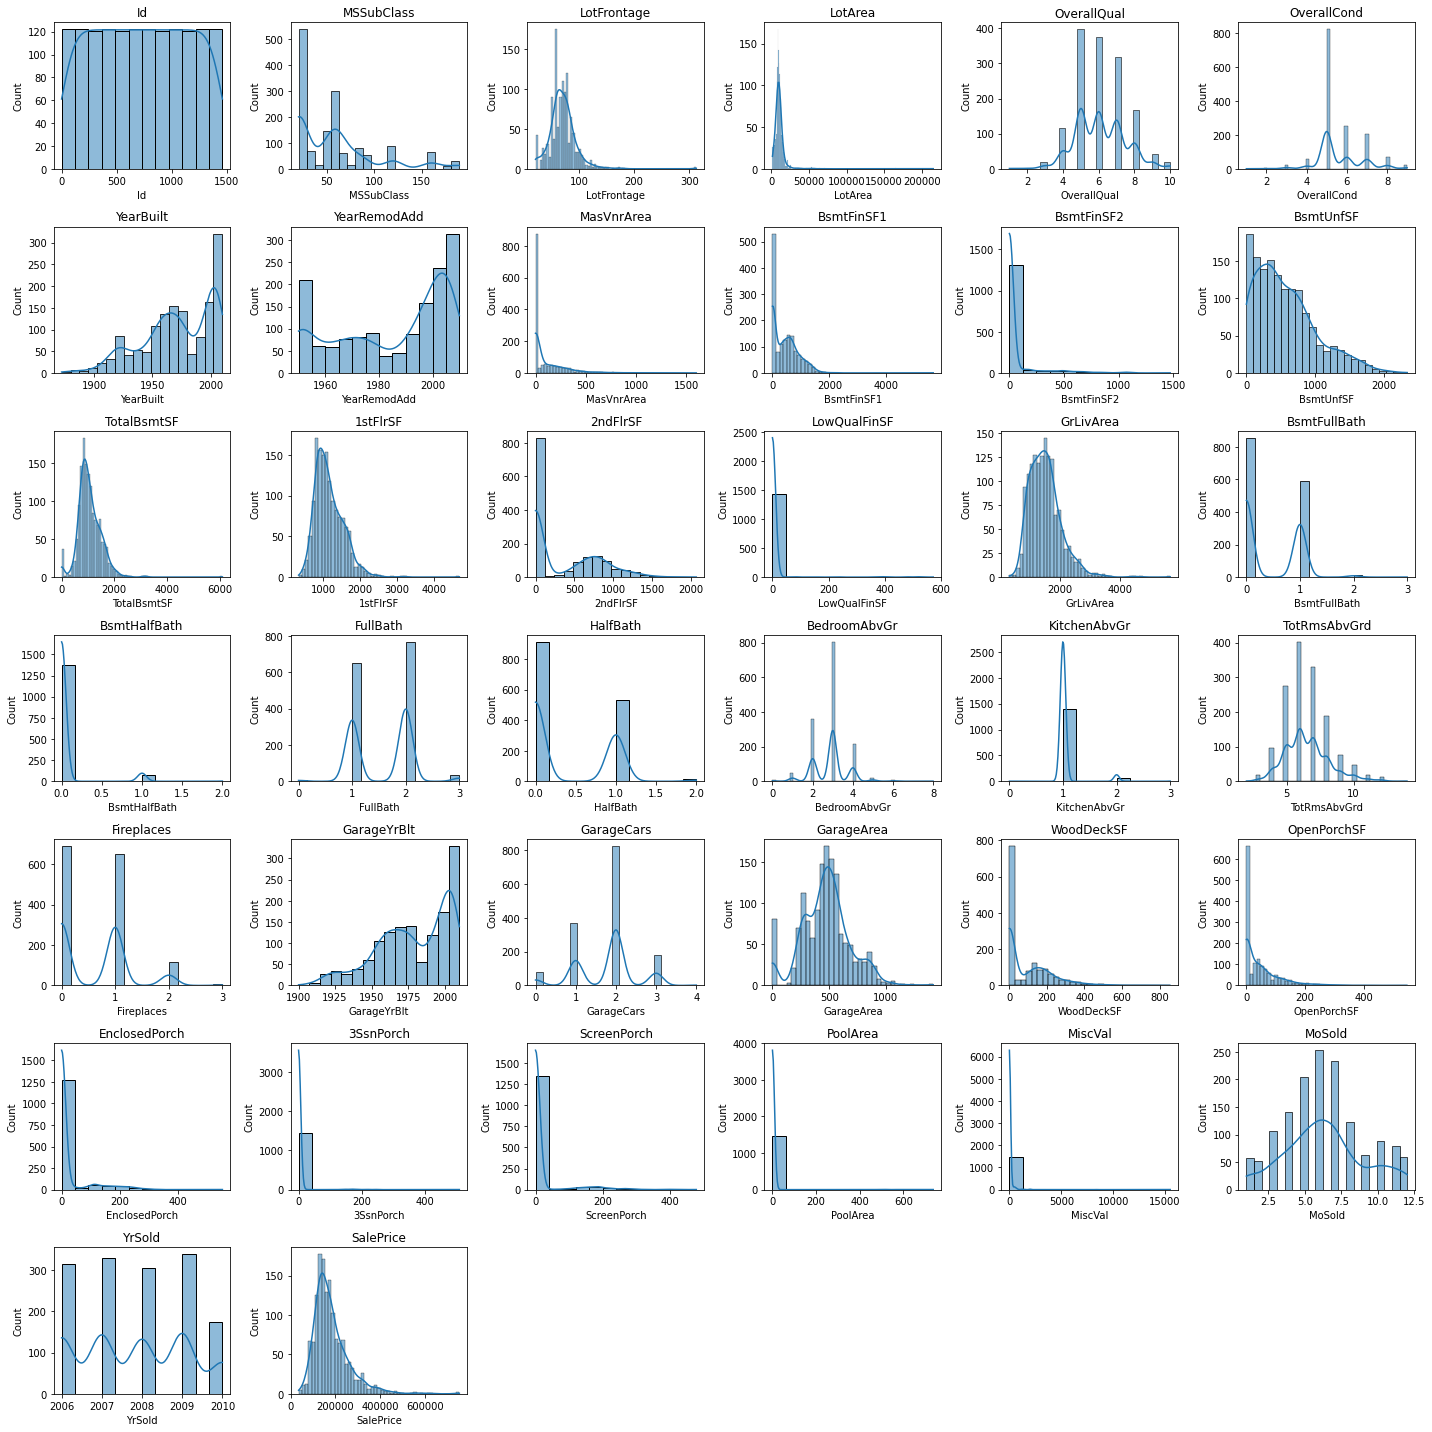

In [13]:

# Plotting histograms for each numerical column
plt.figure(figsize=(20, 20))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(7, 6, i)
    sns.histplot(data[col].dropna(), kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


*Skewed Distributions:*

Columns like LotArea, MasVnrArea, BsmtFinSF1, GarageArea, WoodDeckSF, PoolArea, and MiscVal show significant right-skewness, indicating that most observations have low values with a few high outliers.
SalePrice also appears right-skewed, suggesting that higher-priced properties are less common.

*Uniform Distributions:*

Id has a uniform distribution because it's likely an identifier with unique values.
MSSubClass and OverallQual show several distinct peaks, suggesting categorical data within a numerical column.

*Symmetric or Nearly Normal Distributions:*

GrLivArea, TotalBsmtSF, and GarageCars have distributions closer to normal but may still exhibit slight skewness.
YearBuilt, YearRemodAdd, and GarageYrBlt are slightly right-skewed but have peaks around the 20th-century period, possibly representing growth trends in property development.

*Binary and Few-Level Distributions:*

Columns such as FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, Fireplaces, BsmtFullBath, and BsmtHalfBath have discrete peaks representing low integer values. This reflects features like the number of bathrooms or fireplaces, which often have few levels.

*Seasonal or Categorical Temporal Data:*

MoSold has a somewhat seasonal pattern, with higher sales in specific months, likely due to market cycles.
YrSold appears consistent, without much year-to-year variability, suggesting stable property sales over time.

*Outliers:*

Many distributions indicate potential outliers, especially for features like LotArea, MasVnrArea, and GrLivArea. Outliers may need to be addressed, particularly if they influence the model’s performance.


**EXPLORING CATEGORICAL FEATURES**

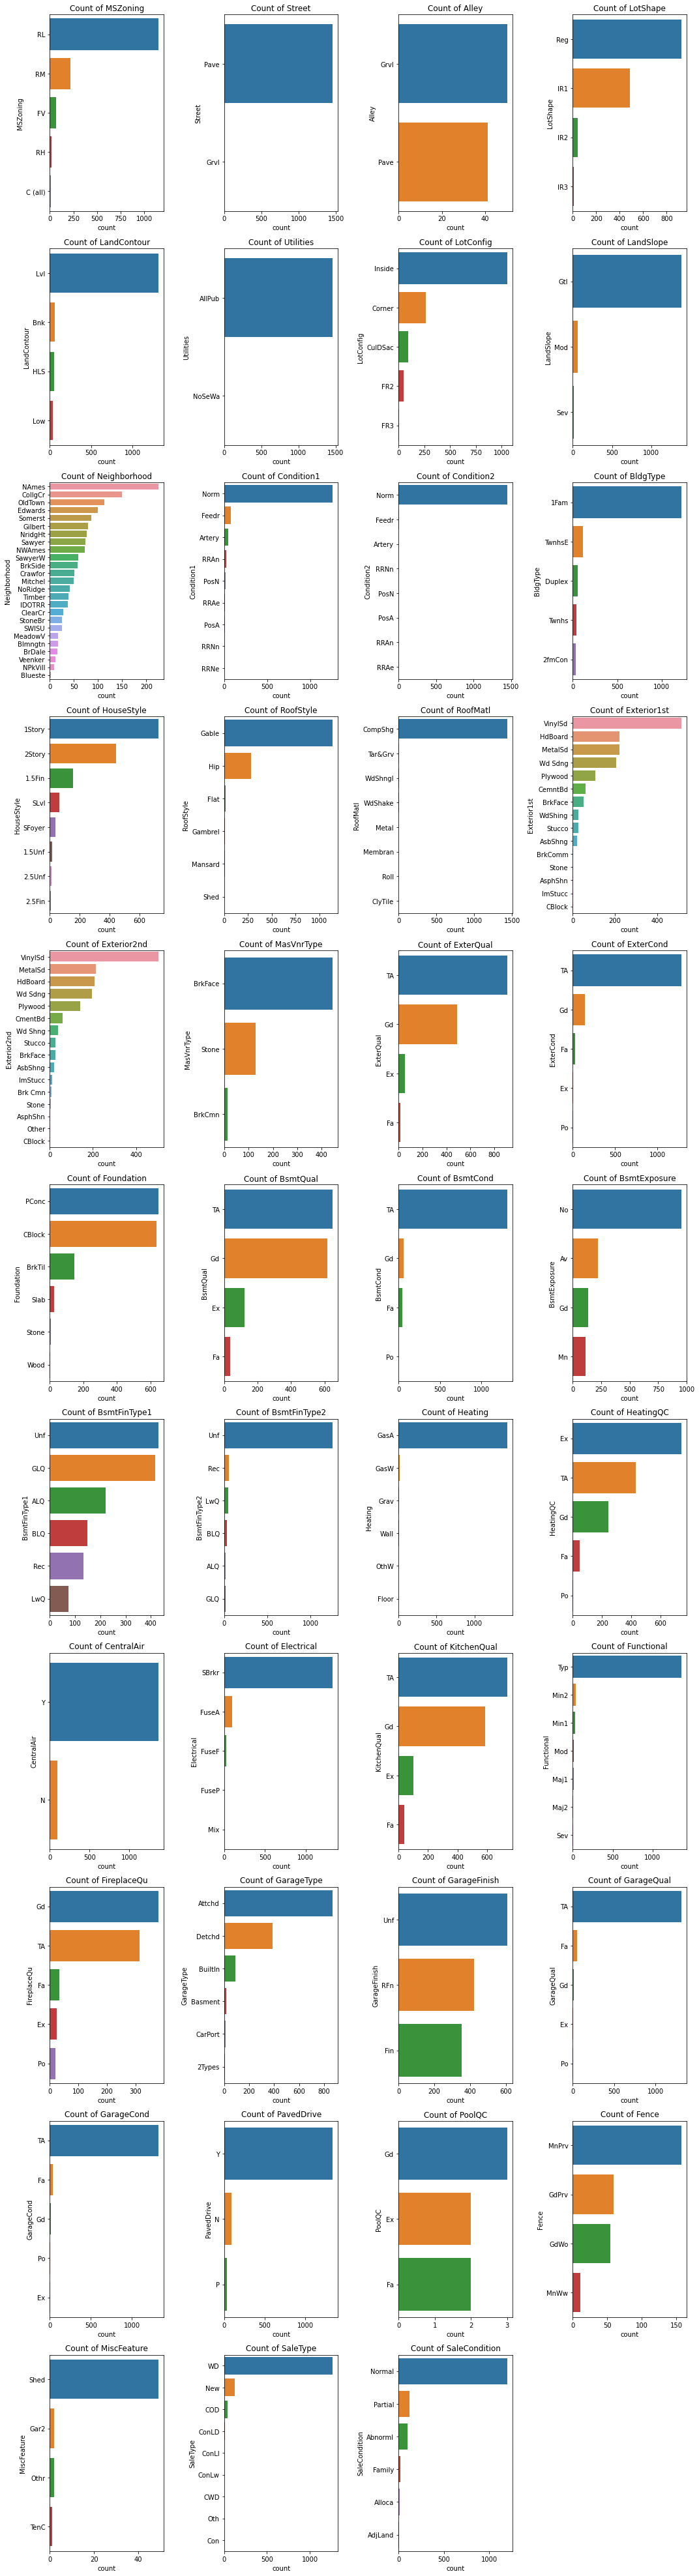

In [16]:
# Categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Determine the grid size based on the number of categorical columns
num_cols = len(categorical_cols)
cols = 4  # Set the number of columns in the grid (adjust if necessary)
rows = (num_cols // cols) + (num_cols % cols > 0)  # Calculate required rows

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(y=data[col], order=data[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Count of {col}')

# Hide any empty subplots (in case of an odd number of categorical columns)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


1. Highly Skewed Distributions

Many categorical features have a strong skew, with one category dominating. For instance, some columns show a single large bar, with little representation from other categories.

Examples: Features like "Utilities" or "Street" often show this pattern, as most homes might share the same type of utilities or street access.
Impact: These features may contribute limited information due to their lack of variability, making it harder to differentiate target values. While skewed categories might not be very helpful on their own, they could still be useful in combination with other features.

2. High Cardinality Categorical Features

Some plots display a wide range of unique values (many small bars), indicating high cardinality, or numerous distinct categories within a feature.

Examples: Features like "Neighborhood" or "Condition" often have many unique values.
Impact: High-cardinality features can be tricky to process in models. Direct encoding, such as one-hot encoding, can lead to sparse matrices and high computational costs. Target encoding or dimensionality reduction may work better for these features.

3. Moderately Balanced Distributions

Some features have a fairly balanced distribution, with multiple categories at similar count levels. This balance can help differentiate classes in the target variable.

Examples: Features like "Exterior Quality" or "Foundation Type" may show this balance, as these attributes vary more across homes.
Impact: Balanced distributions provide diverse categories that aid in model learning without any one category dominating. These features are often well-suited for direct encoding.

4. Sparse or Rare Categories

Some plots include many bars with low counts, representing categories that occur infrequently. These rare categories could reflect uncommon conditions, materials, or designs.

Examples: Features like "Condition" or "Roof Material" might include rare categories, shown as thin bars in the chart.
Impact: Sparse categories can add noise and potentially lower model performance due to their limited occurrences. Grouping these into an "Other" category or using special encoding methods can help prevent overfitting.

5. Data Quality Issues

Some distributions may expose data quality issues, like categories with no data (empty bars), unusual patterns, or unexpectedly high counts for a single category. These issues might stem from data entry errors, missing data, or collection inconsistencies.

Examples: An empty or near-empty bar in a feature that should be well-represented (e.g., "House Style") might signal missing values or data entry mistakes.
Impact: It's useful to investigate these anomalies, as they could introduce bias or reduce model reliability if unaddressed. Missing or incorrect values may need to be fixed through imputation, exclusion, or correction.

6. Dominant Features in Prediction

Some categorical features, while skewed, could still be informative if they represent essential attributes. For instance, a feature like "Heating" might be dominated by one type, with a minority using a more efficient or premium type, which could be relevant for predicting things like house prices.

Impact: Though skewed, certain dominant features can have predictive value, especially if rare categories represent premium aspects (e.g., high-end materials). Feature engineering, such as adding binary indicators for rare categories, can help use these features effectively.

**SCATTER PLOTS FOR SELECTED FEATURES**

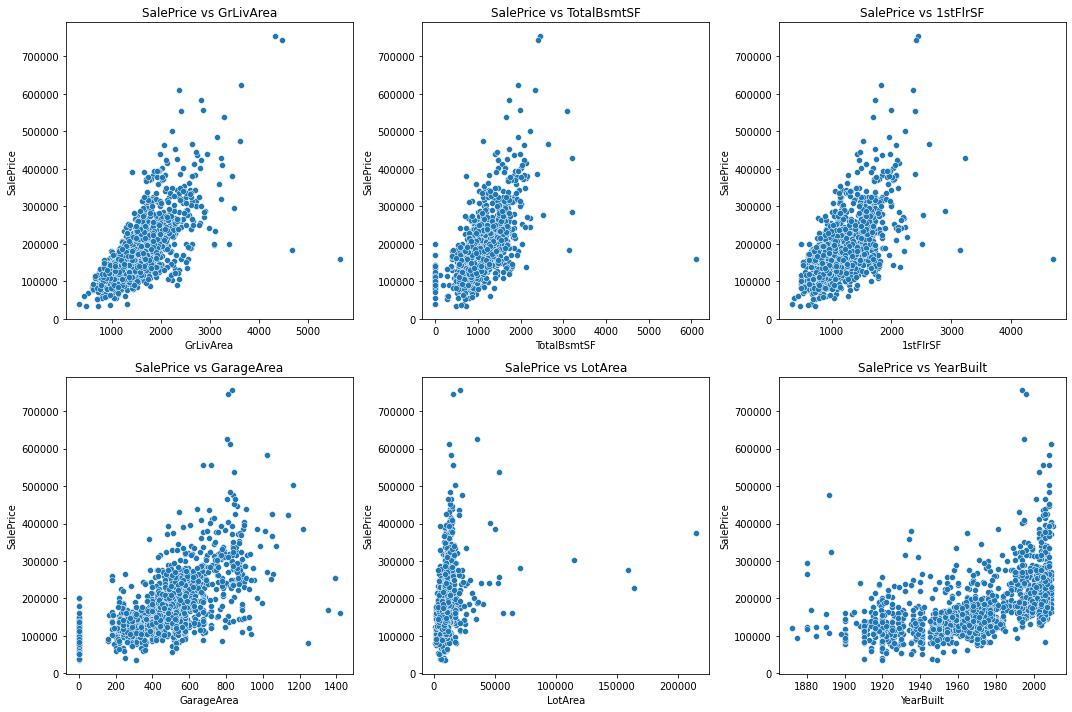

In [17]:
# Selected features to plot against SalePrice
features = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'LotArea', 'YearBuilt']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=data[feature], y=data['SalePrice'])
    plt.title(f'SalePrice vs {feature}')
plt.tight_layout()
plt.show()


1. GrLivArea vs SalePrice: This plot shows a positive correlation, indicating that larger above-ground living areas tend to correspond to higher sale prices, though there are a few outliers with very high prices for large living areas.

2. TotalBsmtSF vs SalePrice: There's also a positive correlation here, suggesting that larger basement areas are associated with higher sale prices, though a few outliers may need to be handled.

3. 1stFlrSF vs SalePrice: Similar to GrLivArea, larger first-floor areas are generally associated with higher sale prices, with a few outliers.

4. GarageArea vs SalePrice: A positive trend is visible, indicating that larger garage areas may contribute to a higher sale price.

5. LotArea vs SalePrice: The points here are more scattered, and while there is some positive correlation, there are many high-sale-price outliers for relatively small lots, suggesting other factors might also play significant roles.

6. YearBuilt vs SalePrice: There seems to be a slight upward trend with newer homes generally commanding higher prices, but the relationship isn’t as strong as in the area-based features.

These insights suggest that most of these features could be useful predictors in a model for SalePrice, especially the area-based features like GrLivArea, TotalBsmtSF, and GarageArea

**OUTLIER DETECTION**

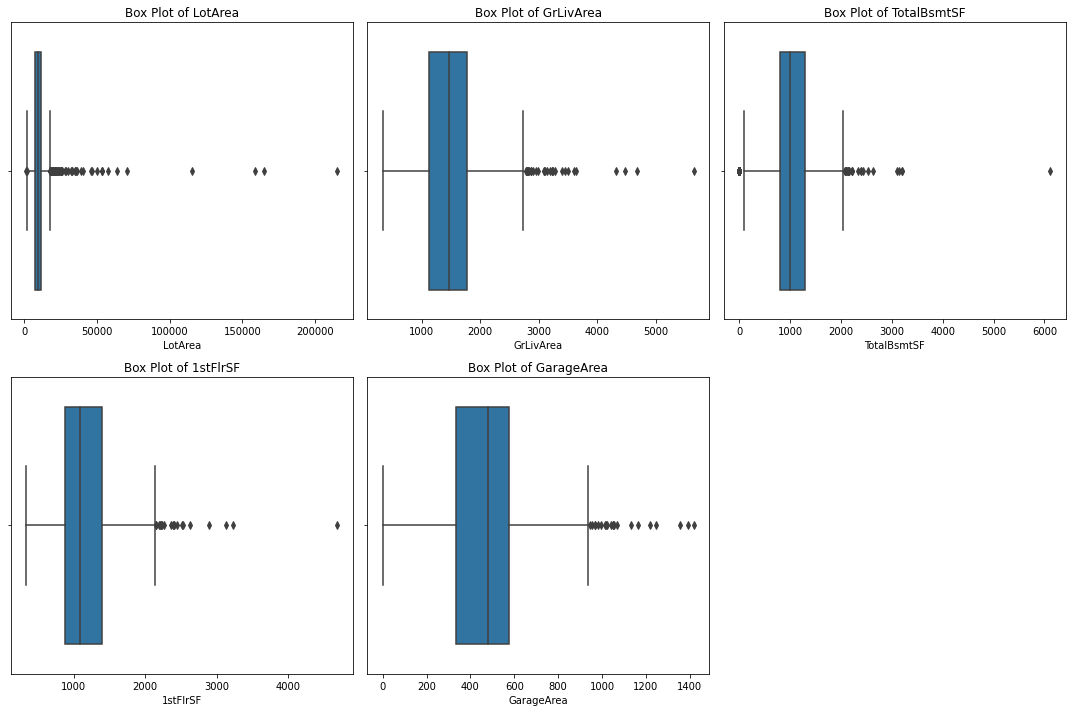

In [18]:
# Plotting box plots for potential outliers
outlier_features = ['LotArea', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(outlier_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=data[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()


1. LotArea: There are significant outliers in this feature, with many points extending far beyond the upper whisker. This suggests that while most properties have similar lot sizes, a few have exceptionally large areas, which could skew analysis.

2. GrLivArea: There are some high outliers, indicating that most properties fall within a certain range for above-ground living area, with a few much larger homes.

3. TotalBsmtSF: Like GrLivArea, this feature has high outliers, indicating some homes with substantially larger basement areas than the typical range.

4. 1stFlrSF: This feature has a similar pattern, with some extreme values that might represent outliers.

5. GarageArea: A few outliers exist on the high end, suggesting some properties have larger garages than typical.

*Next Steps:*

Handling Outliers: Depending on the model you plan to use, you might consider handling these outliers by either removing them or transforming the data (e.g., using log transformations). This could improve model performance by reducing skewness.

Further Analysis: It might be helpful to examine these outliers in the context of the target variable (SalePrice) to see if they contribute valuable information or if they disproportionately impact model accuracy.

**DATA PREPROCESSING**

**DATA CLEANING**

In [19]:
# Calculate percentage of missing values per column
missing_percentage = data.isnull().mean() * 100

# Display columns with missing values and their percentage
print("Missing Percentage per Column:")
print(missing_percentage[missing_percentage > 0])

Missing Percentage per Column:
LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


c:\Users\hp\anaconda\envs\learn-env\lib\site-packages\missingno\missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


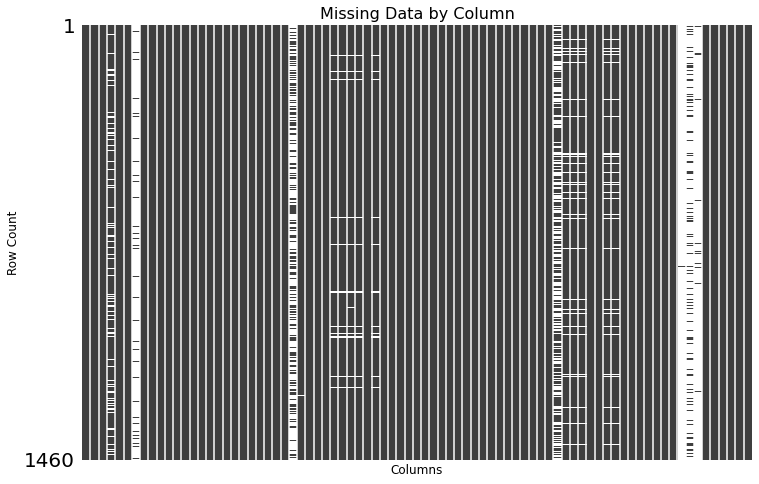

In [22]:
import missingno as msno

# Plot missing data
fig, ax = plt.subplots(figsize=(12, 8))
msno.matrix(data, sparkline=True, ax=ax)

# Set title and labels
ax.set_title('Missing Data by Column', fontsize=16)
ax.set_xlabel('Columns', fontsize=12)
ax.set_ylabel('Row Count', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

plt.show()



*Key Observations:*

Columns with Significant Missing Values: There are several columns with a high proportion of missing values. These may require imputation, deletion, or alternative handling, especially if they're crucial for your analysis.

Patterns of Missing Data: Certain columns have missing data in similar rows, which may indicate dependencies or shared conditions (e.g., missing values related to features such as basements or garages could mean that these properties lack those features).

*Handling Strategies:*

Columns with High Missingness: For columns with a high percentage of missing values, removing them if they’re not essential, or filling them with a constant, like "None" for categorical data.

Imputation: For columns with moderate missingness, using median or mean imputation (for numerical data) or the most frequent category (for categorical data).

In cases where a column has more than 50% missing values, it’s generally a good practice to drop that column because:

Insufficient Information: If a column is missing more than half its data, it likely won’t provide much value for analysis or prediction.

Potential for Bias: If we impute a large portion of missing values, it could introduce significant bias into our model, distorting insights.

Efficient Use of Resources: It is more efficient to remove columns with excessive missing data and focus on more reliable features.

In [23]:
# Dropping columns with more than 50% missing values
data = data.loc[:, missing_percentage <= 50]
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


Imputing the categorical and numerical columns with the most frequent and median respectively

In [ ]:
from sklearn.impute import SimpleImputer

categorical_cols = data.select_dtypes(include=['object', 'category']).columns
numerical_cols = data.select_dtypes(include=['number']).columns

# Fill missing values for categorical columns with the most frequent value (mode)
categorical_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = pd.DataFrame(
    categorical_imputer.fit_transform(data[categorical_cols]),
    columns=categorical_cols
)

# Fill missing values for numerical columns with the median value
numerical_imputer = SimpleImputer(strategy='median')
data[numerical_cols] = pd.DataFrame(
    numerical_imputer.fit_transform(data[numerical_cols]),
    columns=numerical_cols
)

# Verify the missing values are filled
print("Missing values after imputation:")
print(data.isnull().sum())



Missing values after imputation:
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64


<ipython-input-27-3b12ba690363>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[categorical_cols] = pd.DataFrame(
<ipython-input-27-3b12ba690363>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numerical_cols] = pd.DataFrame(


In [28]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,WD,Normal,208500.0
1,2.0,20.0,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,...,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,WD,Normal,181500.0
2,3.0,60.0,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,WD,Normal,223500.0
3,4.0,70.0,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,...,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,5.0,60.0,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,...,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,WD,Normal,250000.0


**DEALING WITH CATEGORICAL COLUMNS**

In [29]:
categorical_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [32]:
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True).astype(int)
data_encoded

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65,8450,7,5,2003,2003,196,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80,9600,6,8,1976,1976,0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68,11250,7,5,2001,2002,162,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60,9550,7,5,1915,1970,0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84,14260,8,5,2000,2000,350,655,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62,7917,6,5,1999,2000,0,0,...,0,0,0,0,1,0,0,0,1,0
1456,1457,20,85,13175,6,6,1978,1988,119,790,...,0,0,0,0,1,0,0,0,1,0
1457,1458,70,66,9042,7,9,1941,2006,0,275,...,0,0,0,0,1,0,0,0,1,0
1458,1459,20,68,9717,5,6,1950,1996,0,49,...,0,0,0,0,1,0,0,0,1,0


**CORRELATION MATRIX**

In [18]:
# Separate features and target variable
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing pipelines
# Pipeline for numerical data: filling missing values and scaling
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Pipeline for categorical data: encoding
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine both transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Final preprocessing pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform training data
X_train_preprocessed = model_pipeline.fit_transform(X_train)
X_test_preprocessed = model_pipeline.transform(X_test)

print("Preprocessing complete. Training and test sets are ready for modeling.")


Preprocessing complete. Training and test sets are ready for modeling.


In [36]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,Y,0,61,0,0,0,0,0,WD,Normal
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,Y,298,0,0,0,0,0,0,WD,Normal
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,Y,0,42,0,0,0,0,0,WD,Normal
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,Y,0,35,272,0,0,0,0,WD,Abnorml
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,Y,192,84,0,0,0,0,0,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Reg,Lvl,Inside,Gtl,Gilbert,Norm,...,Y,0,40,0,0,0,0,0,WD,Normal
1456,20,RL,85.0,13175,Reg,Lvl,Inside,Gtl,NWAmes,Norm,...,Y,349,0,0,0,0,0,0,WD,Normal
1457,70,RL,66.0,9042,Reg,Lvl,Inside,Gtl,Crawfor,Norm,...,Y,0,60,0,0,0,0,2500,WD,Normal
1458,20,RL,68.0,9717,Reg,Lvl,Inside,Gtl,NAmes,Norm,...,Y,366,0,112,0,0,0,0,WD,Normal


**BASELINE LINEAR REGRESSION MODEL**

In [20]:

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train_preprocessed, y_train)

# Make predictions and evaluate
y_pred_lr = lr_model.predict(X_test_preprocessed)
print("Linear Regression - RMSE:", mean_squared_error(y_test, y_pred_lr, squared=False))
print("Linear Regression - R^2:", r2_score(y_test, y_pred_lr))


Linear Regression - RMSE: 32376.751449678675
Linear Regression - R^2: 0.8633364467013083


**DECISION TREE REGRESSOR**

In [21]:


# Initialize and train the model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_preprocessed, y_train)

# Make predictions and evaluate
y_pred_dt = dt_model.predict(X_test_preprocessed)
print("Decision Tree - RMSE:", mean_squared_error(y_test, y_pred_dt, squared=False))
print("Decision Tree - R^2:", r2_score(y_test, y_pred_dt))


Decision Tree - RMSE: 43119.39748456032
Decision Tree - R^2: 0.7576006040408878


**RANDOM FOREST REGRESSOR**

In [22]:
# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_preprocessed, y_train)

# Make predictions and evaluate
y_pred_rf = rf_model.predict(X_test_preprocessed)
print("Random Forest - RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))
print("Random Forest - R^2:", r2_score(y_test, y_pred_rf))


Random Forest - RMSE: 29008.64189932784
Random Forest - R^2: 0.8902913276289411


**GRADIENT BOOSTING REGRESSOR**

In [23]:
# Initialize and train the model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_preprocessed, y_train)

# Make predictions and evaluate
y_pred_gb = gb_model.predict(X_test_preprocessed)
print("Gradient Boosting - RMSE:", mean_squared_error(y_test, y_pred_gb, squared=False))
print("Gradient Boosting - R^2:", r2_score(y_test, y_pred_gb))


Gradient Boosting - RMSE: 27776.632451247733
Gradient Boosting - R^2: 0.8994121906303318


**XGBOOST REGRESSOR**

In [24]:
# Initialize and train the model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train_preprocessed, y_train)

# Make predictions and evaluate
y_pred_xgb = xgb_model.predict(X_test_preprocessed)
print("XGBoost - RMSE:", mean_squared_error(y_test, y_pred_xgb, squared=False))
print("XGBoost - R^2:", r2_score(y_test, y_pred_xgb))


XGBoost - RMSE: 29521.754460431377
XGBoost - R^2: 0.8863758902971598


**LASSO REGRESSION**

In [25]:
# Initialize and train the model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_preprocessed, y_train)

# Make predictions and evaluate
y_pred_lasso = lasso_model.predict(X_test_preprocessed)
print("Lasso - RMSE:", mean_squared_error(y_test, y_pred_lasso, squared=False))
print("Lasso - R^2:", r2_score(y_test, y_pred_lasso))


Lasso - RMSE: 32366.826740086155
Lasso - R^2: 0.8634202190460766


c:\Users\hp\anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50294907263.70776, tolerance: 696659484.3571944
  model = cd_fast.sparse_enet_coordinate_descent(


**RIDGE REGRESSION**

In [26]:
# Initialize and train the model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_preprocessed, y_train)

# Make predictions and evaluate
y_pred_ridge = ridge_model.predict(X_test_preprocessed)
print("Ridge - RMSE:", mean_squared_error(y_test, y_pred_ridge, squared=False))
print("Ridge - R^2:", r2_score(y_test, y_pred_ridge))


Ridge - RMSE: 31669.843204455825
Ridge - R^2: 0.8692390725631692
